# Исследование данных о российском кинопрокате

# Описание проекта   
Заказчик этого исследования — Министерство культуры Российской Федерации. 
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

<h1>Ход исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Объединение-данных-в-общий-датафрейм." data-toc-modified-id="Объединение-данных-в-общий-датафрейм.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Объединение данных в общий датафрейм.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-типов-данных" data-toc-modified-id="Проверка-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка типов данных</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Изучение-категориальных-значений" data-toc-modified-id="Изучение-категориальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Изучение категориальных значений</a></span></li><li><span><a href="#Изучение-количественных-значений" data-toc-modified-id="Изучение-количественных-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Изучение количественных значений</a></span></li><li><span><a href="#Новые-столбцы" data-toc-modified-id="Новые-столбцы-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Новые столбцы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследование-фильмов,-которые-получили-государственную-поддержку" data-toc-modified-id="Исследование-фильмов,-которые-получили-государственную-поддержку-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование фильмов, которые получили государственную поддержку</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Объединение данных в общий датафрейм.

In [1]:
# !pip install -U fuzzywuzzy[speedup]
# !pip install -U missingno

In [2]:
import warnings

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import seaborn as sns
from fuzzywuzzy import fuzz

In [3]:
warnings.filterwarnings('ignore')

In [4]:
def get_df(file_name):
    path_to_file = os.path.relpath(os.path.join('datasets/', file_name))
    if os.path.isfile(path_to_file):
        return pd.read_csv(path_to_file)
    raise Exception('Данные отсутствуют')

In [5]:
movies_df = get_df('mkrf_movies.csv')
shows_df = get_df('mkrf_shows.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format',
              lambda x: f'{x:,.2f}'.replace(',', ' '))

In [6]:
movies_df.info()
shows_df.info()
display(movies_df.head(5))
shows_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2 450.00
1,111000115,61 040.00
2,111000116,153 030 013.40
3,111000117,12 260 956.00
4,111000118,163 684 057.79


**Найдём и обработаем значения `puNumber`, которые не преобразуются в числовой тип данных.**

In [7]:
tuple(movies_df.loc[~movies_df['puNumber'].str.isnumeric(), 'puNumber'].items())

((804, ' 111004112'), (1797, 'нет'))

In [8]:
movies_df.loc[804, 'puNumber'] = movies_df.loc[804, 'puNumber'].strip()
movies_df.loc[1797, 'puNumber'] = '0'
movies_df.loc[[804, 1797], 'puNumber'].values

array(['111004112', '0'], dtype=object)

**Приведём `puNumber` к целочисленному типу.**

In [9]:
movies_df['puNumber'] = pd.to_numeric(movies_df['puNumber'], downcast='integer')
movies_df['puNumber'].apply(type).value_counts()

<class 'int'>    7486
Name: puNumber, dtype: int64

In [10]:
duplicates_check = {
    'уникальные значения puNumber': (shows_df['puNumber'].nunique(),
                                     movies_df['puNumber'].nunique()),
    'количество значений puNumber': (shows_df.shape[0], movies_df.shape[0])
}

pd.DataFrame(index=['shows_df', 'movies_df'], data=duplicates_check)

,уникальные значения puNumber,количество значений puNumber
shows_df,3158,3158
movies_df,7484,7486


**Проверим, находятся ли дубликаты `puNumber` из `movies_df` среди значений таблицы `shows_df`.**

In [11]:
duplicated_pu = \
movies_df.loc[movies_df['puNumber'].duplicated(), 'puNumber'].values
set(shows_df['puNumber'].values).intersection(duplicated_pu)

set()

**Объединим таблицы `movies_df` и `shows_df` по номеру прокатного удостоверения.**

In [12]:
df = movies_df.merge(shows_df, on='puNumber', how='left')

In [13]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Убедимся, что все объекты из набора данных `mkrf_movies` находятся в таблице `df`.

In [14]:
df.drop('box_office', axis=1).equals(movies_df)

True

**Вывод:**    
- получены два набора данных, содержащих информацию о кинопрокате;
- значения `puNumber` приведены к целочисленному типу;
- данные объединены в общую таблицу по номеру прокатного удостоверения;
- проведена проверка, что полученная таблица содержит все объекты из набора данных `mkrf_movies`.

## Предобработка данных

### Проверка типов данных

In [15]:
df['show_start_date'] = \
pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.normalize()
df['show_start_date']

0      2015-11-27
1      2016-09-13
2      2016-10-10
3      2016-06-10
4      2015-07-29
          ...    
7481   2019-12-23
7482   2019-12-24
7483   2019-12-28
7484   2019-12-30
7485   2019-12-30
Name: show_start_date, Length: 7486, dtype: datetime64[ns]

In [16]:
df.query('ratings.str.contains(r"[^(?:\d\.\d)]", na=False)')['ratings'].unique()

array(['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%',
       '90%', '19%', '88%', '89%', '98%'], dtype=object)

Значения в процентах не соответствуют пользовательскому рейтингу на Кинопоиске, поэтому для преобразования  
воспользуемся методом `to_numeric` с аргументом `coerce`.

In [17]:
df['ratings'] = pd.to_numeric(df['ratings'], downcast='float', errors='coerce')
df['ratings']

0      7.20
1      6.60
2      6.80
3      6.80
4      6.80
       ... 
7481    NaN
7482   5.40
7483    NaN
7484    NaN
7485   6.30
Name: ratings, Length: 7486, dtype: float32

In [18]:
df['type'] = df['type'].astype('category')

In [19]:
df['age_restriction'] = df['age_restriction'].astype('category')
restriction_categories = [
    '«0+» - для любой зрительской аудитории',
    '«6+» - для детей старше 6 лет',
    '«12+» - для детей старше 12 лет',
    '«16+» - для детей старше 16 лет',
    '«18+» - запрещено для детей',
]
df['age_restriction'] = \
df['age_restriction'].cat.reorder_categories(restriction_categories,
                                             ordered=True)
df['age_restriction'].cat.ordered

True

### Пропуски

In [20]:
temp = df.copy()
len(temp)

7486

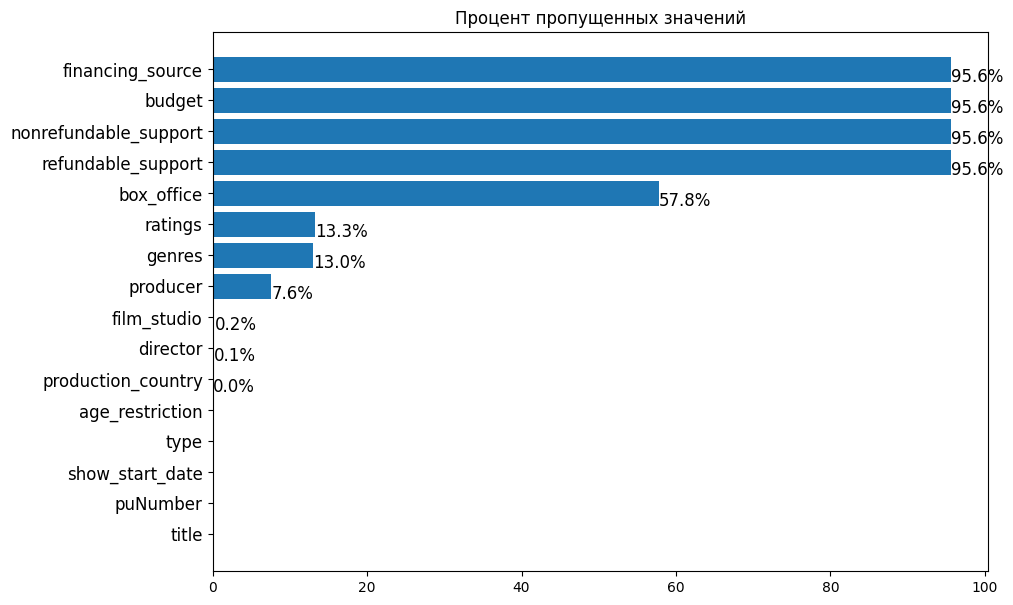

In [21]:
percent_missing = df.isna().mean() * 100
percent_missing.sort_values(inplace=True)

ax = plt.barh(percent_missing.index, percent_missing.values)
plt.title('Процент пропущенных значений')
plt.gcf().set_size_inches(10, 7)
plt.yticks(fontsize=12)
for item in ax.patches:
    if item.get_width():
        plt.text(item.get_width(), item.get_y(),
                 f'{item.get_width():.1f}%',
                 fontsize=12)

Отсортируем данные по стране производства, построим матрицу пропусков и тепловую карту их корреляции.

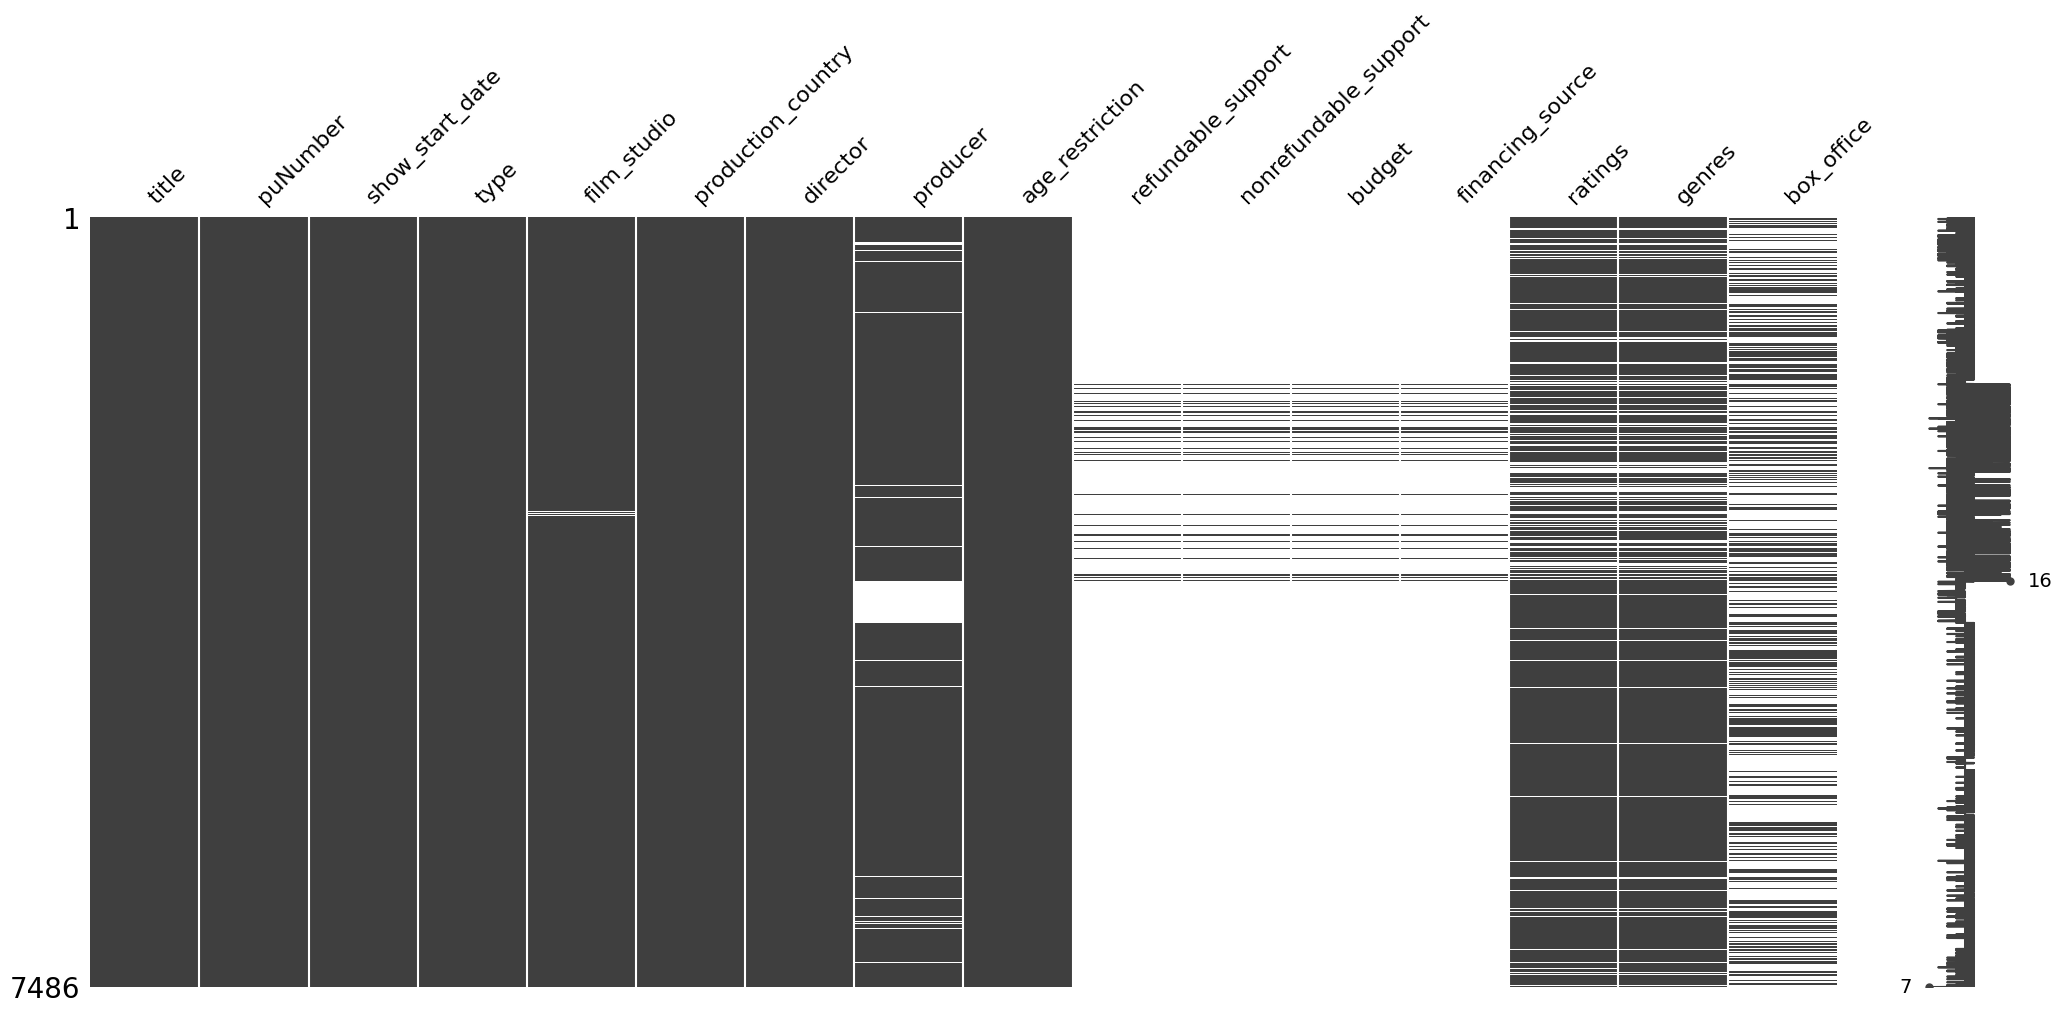

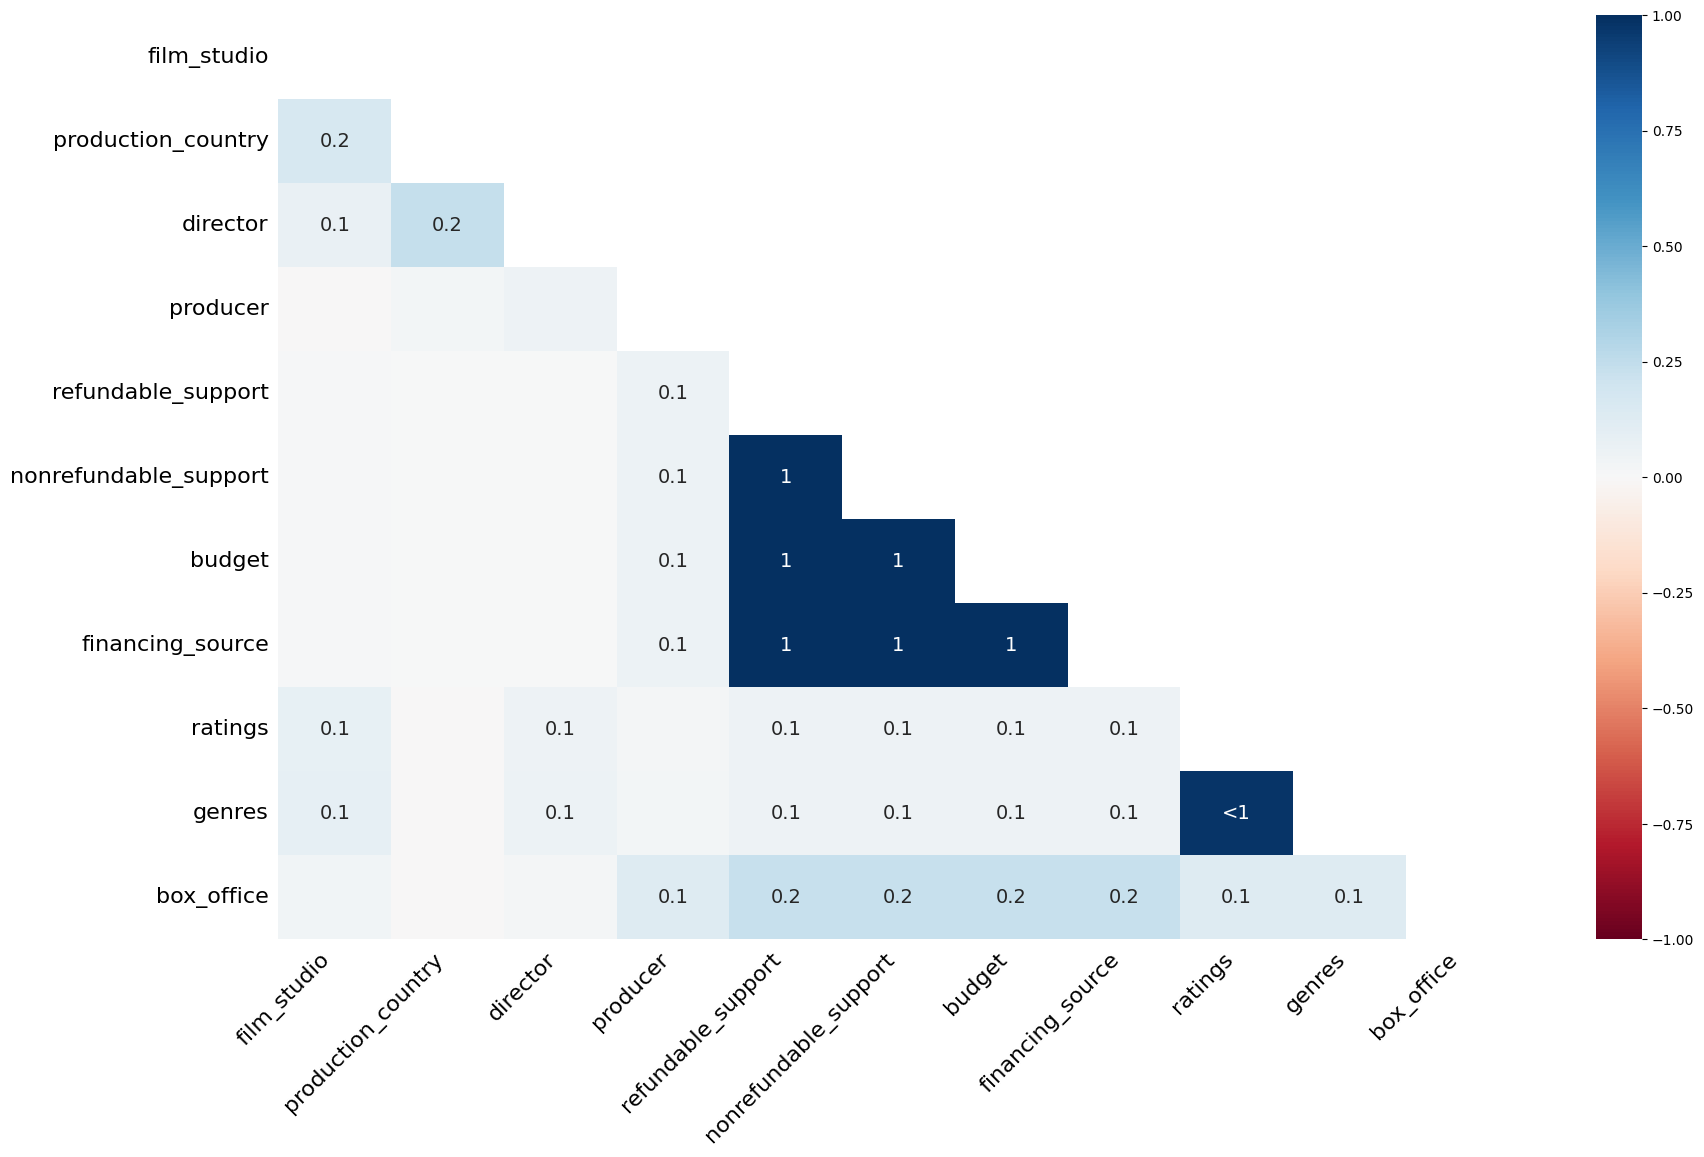

In [22]:
msno.matrix(df.sort_values(by='production_country'))
msno.heatmap(df);

1. `box_office`  
Пропуски, вероятно, обусловлены тем, что прокатное удостоверение было получено для демонстрации фильма на телевидении,  
либо для участия в некоммерческих показах.

In [23]:
df.query('producer.isna()')['production_country'].value_counts().head(5)

СССР              342
Россия             37
Великобритания     33
США                24
СССР               20
Name: production_country, dtype: int64

2. `producer`   
Основная часть пропусков сосредоточена в строках с фильмами производства СССР.  
В Советском Союзе профессия продюсера формально не существовала, схожие функции выполнял директор картины.

3. `ratings`, `genres`    
С учётом того, что рейтинг и жанр фильма получали из базы данных Кинопоиска, то основная часть пропусков, вероятно,  
связана с тем, что соответствующие ленты там отсутствуют, либо запрос не вернул нужную информацию из-за 
проблем с данными, передаваемыми в параметрах.
Также у многих фильмов на Кинопоиске недостаточно оценок для формирования рейтинга.

4. `financing_source`, `budget`, `refundable_support`, `nonrefundable_support`  
Данные в этих столбцах указаны только для тех фильмов, которые получили государственную поддержку.

5. `director`, `production_country`   

In [24]:
na_indices = (df[['director', 'production_country']]
              .isna().unstack()[lambda x: x > 0].index.get_level_values(1))
df.loc[[4415, 4441], 'director'] = 'Энтони М. Бонджови', 'Василий Пичул'
df.loc[[3186, 4441], 'production_country'] = 'Россия'
df['director'] = df['director'].fillna('unknown')
df.loc[na_indices]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берлин. Анна Нетребко. Йонес Кауфман. Эрвин Шрот.",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,unknown,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44 350.00
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,unknown,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,unknown,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфуллиннын 50 еллык ижат юбилеена багышланган концерт"". (Родники деревни. Юбилейный концерт, посвященный 50-летию творчества Ганса Сайфуллина.)",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,unknown,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,unknown,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,Энтони М. Бонджови,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,Россия,Василий Пичул,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Королевский колледж Кембриджа,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,unknown,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,unknown,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN
3186,"Детский юмористический киножурнал ""Ералаш. Ну просто фантазтика!""",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А.Зеленков, М.Сулейманова и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194 527.00


### Дубликаты

In [25]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

**Явные дубликаты в столбце с названиями фильмов.**

In [26]:
duplicated = df[['title', 'director']].duplicated().sum()
print(f'Название {duplicated} фильмов встречается более одного раза.')

Название 683 фильмов встречается более одного раза.


In [27]:
def get_condition(column, value, first_lim, second_lim, attr1, attr2):
    if column in {'director', 'main_director', 'producer'}:
        return (lambda other: value[0] == other[0]
                and getattr(fuzz, attr1)(value, other) > first_lim)
    if column == 'filtered_studio':
        return lambda other: getattr(fuzz, attr1)(value, other) > first_lim
    return (
        lambda other: (getattr(fuzz, attr1)(value[0], other[0]) > first_lim)
        and (getattr(fuzz, attr2)(value[1], other[1]) > second_lim)
    )

In [28]:
def get_similar_values(data, *cols, first_lim=64, second_lim=70,
                       attr1='ratio', attr2='partial_ratio', end_idx=-8000):
    '''Функция для поиска неявных дубликатов'''
    cols = list(cols)
    unique_df = (
        data.drop_duplicates(subset=cols)
        .dropna(subset=cols)[cols]
    )

    if cols[0] == 'title':
        unique_values = list(map(tuple, unique_df.values.tolist()))
    else:
        unique_values = unique_df[cols[0]].tolist()

    similar_values = {}
    processed = []

    while unique_values:
        value = unique_values.pop()

        if value not in processed:
            matches = filter(
                get_condition(cols[0], value, first_lim,
                              second_lim, attr1, attr2),
                unique_values[end_idx:]
            )
            matches = list(matches)

            if matches:
                similar_values[value] = matches
                processed.extend(matches)

    return similar_values

**Неявные дубликаты в столбце с названиями фильмов.**

In [29]:
not_tv_series = df.query('not title.str.contains(r"выпуск|серия", case=False)')
similar_titles = get_similar_values(not_tv_series.sort_values(by='title'),
                                    'title', 'director', end_idx=-10)

In [30]:
(
    pd.DataFrame.from_dict(similar_titles, orient='index')
    .sort_index().reset_index()
)

,index,0,1,2,3
0,"(10 лет спустя., Джеми Линден)","(10 лет спустя, Джеми Линден)",None,None,None
1,"(300 спартанцев: Расцвет империи /По произведению Фрэнка Миллера ""Ксеркс""/., Ноам Мурро)","(300 спартанцев: Расцвет империи /По произведению Фрэнка Миллера ""Ксеркс""/, Ноам Мурро)","(300 спартанцев: Расцвет империи /По произведению Фрэнка Миллера ""Ксеркс""/ (на английском языке), Ноам Мурро)",None,None
2,"(8 новых свиданий, М.Бальчюнас)","(8 лучших свиданий, М.Бальчюнас)",None,None,None
3,"(Superнянь 2, Николас Бенаму, Филипп Лашо)","(Superнянь, Николас Бенаму, Филипп Лашо)",None,None,None
4,"(Weekend (Уик-энд)., С.Говорухин)","(Weekend (Уик-энд), С.Говорухин)",None,None,None
...,...,...,...,...,...
172,"(Щенячий патруль: Мегащенки и Шиммер и Шайн, Чарльз Е.Бастьен, Дэвид Нотт, Карин-Энн Андерсон)","(Щенячий патруль: Мегащенки, Чарльз Е.Бастьен)","(Щенячий патруль: Мегащенки и Нелла, отважная принцесса, Чарльз Е.Бастьен, Джили Долев)","(Щенячий патруль: Мегащенки и Отважные птенцы, Чарльз Е.Бастьен, Билл Спирс)",None
173,"(Щенячий патруль: Суперпатруль 2, Чарльз Е.Бастьен)","(Щенячий патруль: Мегащенки, Чарльз Е.Бастьен)",None,None,None
174,"(Эверест ., Бальтазар Кормакур)","(Эверест (2015), Бальтазар Кормакур)",None,None,None
175,"(Эксперимент: Зло., Джон Пог)","(Эксперимент: Зло, Джон Пог)",None,None,None


**Неявные дубликаты в столбце с названиями студий-производителей.**

In [31]:
df['filtered_studio'] = (
    df.query('not film_studio.str.contains(r"[,;]", na=False)')
    ['film_studio'].str.replace(r'^[^\"]*(?=[\"])', '', regex=True)
)

df['filtered_studio'] = (
    df['filtered_studio'].str
    .replace(r'.*(?:Киностудия|Кинокомпания|Компания|Киноконцерн'
             '|\"Студия|Продюсерский|ПК |ТПО )[\sа-я]+', '',
     regex=True)
)

df['filtered_studio'] = \
df['filtered_studio'].str.replace(r' (?:при|по) .*', '', regex=True)

df['filtered_studio'] = \
df['filtered_studio'].str.replace(r'\"', '', regex=True)
df['filtered_studio'] = \
df['filtered_studio'].str.replace(r'\s{2,}', ' ', regex=True)
df['filtered_studio'] = df['filtered_studio'].str.strip('.')
df['filtered_studio'] = df['filtered_studio'].str.strip(' ')

df['filtered_studio'] = df['filtered_studio'].str.strip()
df['filtered_studio'] = df['filtered_studio'].str.lower()
df.loc[6488, 'filtered_studio'] = 'сага'

In [32]:
similar_studios = get_similar_values(
    df.query('not filtered_studio.str.contains(r"[\,\;]", na=False)'),
    'filtered_studio', first_lim=87
)

In [33]:
(
    pd.DataFrame.from_dict(similar_studios, orient='index')
    .sort_index().reset_index()
)

,index,0,1,2,3
0,3 ди интертейнмент,3д интертейнмент,эл ди интертейнмент,None,None
1,cнут интертейнмент,снут интертейнмент,None,None,None
2,а-фильм,арк-фильм,None,None,None
3,америкэн зоетроуп,американ зоутроуп,None,None,None
4,аншутц интертейнмент групп,эншутц интертейнмент груп,None,None,None
...,...,...,...,...,...
66,шаман пикчерс,шаман пикчерз,None,None,None
67,эмерджин пикчерз,эмержин пикчерз,None,None,None
68,эмошн интертейнмент,моушн 58 интертейнмент,None,None,None
69,юниверсал пикчерс,юниверсал пикчерз,None,None,None


**Вывод.**  
В столбцах `puNumber` и `title` обнаружены явные дубликаты. В колонке с названием фильма дубликаты появились в результате того, что многие фильмы получали прокатное удостоверение несколько раз.  
В рассмотренных колонках с категориальными переменными содержится значительное количество неявных дубликатов.  
Причины появления неявных дубликатов:
- отсутствие единого формата записи названий;
- одно и то же иностранное имя собственное по-разному передаётся на русский язык;
- использование буквы "е" вместо "ё";
- опечатки и лишние пробелы.

### Изучение категориальных значений

In [34]:
df['type'].unique()

['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): [' Анимационный', ' Художественный', 'Анимационный', 'Документальный', 'Музыкально-развлекательный', 'Научно-популярный', 'Прочие', 'Художественный']

1. `type`  
Устраним лишние пробелы. 

In [35]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [36]:
df['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

2. `production_country`  
Устраним лишние пробелы, приведём списки стран к единому формату.

In [37]:
df['production_country'] = df['production_country'].str.strip()
df['production_country'] = \
df['production_country'].str.replace(r'\s*([^а-я])\s*', r'\1',
                                     case=False, regex=True)
df['production_country'] = \
df['production_country'].str.replace(r'\,\s*', '-', regex=True)
df.loc[[7247, 6184], 'production_country'] = 'Германия', 'США'
df['production_country'].sort_values().unique()

array(['Австралия', 'Австралия-Великобритания',
       'Австралия-Великобритания-Бельгия-Индия', 'Австралия-Германия',
       'Австралия-Ирландия', 'Австралия-Канада', 'Австралия-Колумбия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия-Великобритания-Германия', 'Австрия-Германия',
       'Австрия-Германия-Франция', 'Австрия-Люксембург',
       'Австрия-Франция-Германия', 'Азербайджан-Россия', 'Аргентина',
       'Аргентина-Бразилия', 'Аргентина-Испания',
       'Аргентина-Испания-Уругвай',
       'Аргентина-Мексика-Бразилия-Франция-США',
       'Аргентина-Уругвай-Россия-Германия-Франция-Нидерланды',
       'Аргентина-Франция-Испания', 'Армения', 'Армения-Германия',
       'Армения-Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия-Великобритания-США',
       'Бельгия-Германия-Канада-Франция-США-Великобритания',
       'Бельгия-Германия-Люксембург',
       'Бельгия-Германия-Люксембург-Франция',
       'Бельгия-Испания-Канада-Нидерланды', 'Бельгия-Итали

In [38]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

3. `financing_source`  
Проблем не обнаружено.

4. `show_start_date`  
Строковые значения были преобразованы в даты. Проблем не обнаружено.

In [39]:
def get_values_with_smallest_difference(values):
    differences = []
    for value in values:
        for other in values[value]:
            length_diff = len(value) - len(other)
            if abs(length_diff) < 3:
                if length_diff < 0:
                    value, other = other, value
                local_diff = set(value).difference(other)
                if local_diff:
                    differences.append((value, other, local_diff))
    return differences

In [40]:
russian_directors = get_similar_values(
    df.query('not director.str.contains(r",|;") and '
             'production_country.str.contains(r"СССР|Россия")'),
    'director', first_lim=87, attr1='partial_ratio'
)

In [41]:
(
    pd.DataFrame.from_dict(russian_directors, orient='index')
    .sort_index().reset_index()
)

,index,0,1,2,3
0,А.Бажанов,А.Баранов,None,None,None
1,А.Бобровский,А.Бобров,None,None,None
2,А.Голубовский,А.Голуб,None,None,None
3,А.Захаров,А.Сахаров,None,None,None
4,А.Кордон,А.Гордон,None,None,None
5,А.Михалков (псевдоним А.Кончаловский),А.Кончаловский,А.Михалков,А.Михайлов,None
6,А.Молочников,А.Молочник,None,None,None
7,А.Мурадов,А.Муратов,None,None,None
8,А.Панкратов-Черный,А.Панкратов,None,None,None
9,А.Першин (псевдоним Ж.Крыжовников),А.Першин,None,None,None


In [42]:
get_values_with_smallest_difference(russian_directors)

[('А.Федоров', 'А.Федотов', {'р'}),
 ('А.Бажанов', 'А.Баранов', {'ж'}),
 ('А.Петрова', 'А.Петров', {'а'}),
 ('В.Потемкин', 'В.Потёмкин', {'е'}),
 ('О Семёнова', 'О.Семёнова', {' '}),
 ('О. Семёнова', 'О Семёнова', {'.'}),
 ('К.Козлова', 'К.Козлов', {'а'}),
 ('Т.Корнеева', 'Т.Корнев', {'а'}),
 ('Н.Чернышева', 'Н.Ченышева', {'р'}),
 ('А.Молочников', 'А.Молочник', {'в'}),
 ('А.Мурадов', 'А.Муратов', {'д'}),
 ('Н.Кудряшова', 'Н.Кудряшов', {'а'}),
 ('В.Павлович', 'В.Павлов', {'и', 'ч'}),
 ('С.Эйзенштейна', 'С.Эйзенштейн', {'а'}),
 ('А.Захаров', 'А.Сахаров', {'З'}),
 ('А.Кордон', 'А.Гордон', {'К'}),
 ('Е.Баранов.  ', 'Е.Барханов', {' '}),
 ('К.Оганисян', 'К.Оганесян', {'и'}),
 ('А.Смирнова', 'А.Смирнов', {'а'})]

In [43]:
df.query(
    'director.str.contains(r"[^А-яё\,\-\s\(\)\.]")'
)['director'].unique()

array(["Томми О'Хавер", "Томми О'Хэйвер", 'unknown', "Эндрю О'Коннор",
       "Энцо Д'Алло",
       'Джейк Армстронг, Рафаэль Валь, Карл-Йохан Вестрегард, Зик Ёрл, Кристофер Калдвел, Жорж Мельес, Тиль Новак, Джонатан Хопкинс, Джакомо Чимини',
       "Майкл Д'Иса-Хоган", 'Ёлкин Туйчиев', "Джонни О'Райлли",
       "Гэвин О'Коннор", 'Ён Сан-хо', 'Тод "Кип" Уильямс',
       "Дэвид О'Расселл", 'И.Цветов (режиссер ч/б фильма - С.Тимошенко)',
       "Д.О'Рейли", "Пэт О'Коннор",
       'Ронан Чапалайн и Паскаль Вьонг; Фрэнсис Верзеймер; Джези Кулар и Даниэль Кюнт; Дидье Гросджин  ',
       "Лайам О'Доннелл",
       'Кристиано Анания, Иления Политано, Валерио Аттаназио, Моника Дуго, Марчелло Ди Ното, Даниэле Пини; Франческа Бруни, Алессандро Капитани',
       'Хиромаса Ёнэбаяси', "А.Рожнова (псевдоним Александра Р'ЮЖ)",
       "Том О'Дэлл", 'П. "Хики" Стручков', "Винсент Д'Онофрио",
       'Сюнъити Ёсидзава', 'Д.Штурманова (псевдоним: Дуня Лисова)',
       "Шон Патрик О'Рейли"], dtype=object)

5. `director`  
Столбец содержит неявные дубликаты.  
В двух списках имена режиссёров разделены точкой с запятой.

In [44]:
similar_foreign_producers = get_similar_values(
    df.dropna(subset=['producer'])
    .query('not producer.str.contains(r",|;") and '
           'not production_country.str.contains(r"СССР|Россия")'),
    'producer', first_lim=87, attr1='partial_ratio'
)

In [45]:
get_values_with_smallest_difference(similar_foreign_producers)

[('Джафар Панахи', 'Джафар панахи', {'П'}),
 ('Вибеке Винделов', 'Вибеке Винделев', {'о'}),
 ('Кевин Фейги', 'Кеви Фейги', {'н'}),
 ('Шаун МакГилливрэй', 'Шон МакГилливрэй', {'у'}),
 ('Гэвин Полоун', 'Гэвин Полон', {'у'}),
 ('Денис Рим', 'Дениз Рим', {'с'}),
 ('Хулио Фернандез', 'Хулио Фернандес', {'з'}),
 ('Петро Л.Серапиглия', 'Петро Серапиглия', {'.', 'Л'}),
 ('Кувин Фейдж', 'Кевин Фейдж', {'у'}),
 ('Лоренцо ди Бонавентура', 'Лоренцо Ди Бонавентура', {'д'}),
 ('Питер Дел Веко', 'Питер Дел Вечо', {'к'}),
 ('Дональд Ди Лайн', 'Дональд Де Лайн', {'и'}),
 ('Кэтрин Бозорган', 'Катрин Бозорган', {'э'}),
 ('Джоэл Сильвер', 'Джоэл Силвер', {'ь'}),
 ('Паскаль Кошето', 'Паскаль Кочето', {'ш'}),
 ('Мишель Сент-Жан', 'Мишель Сен-Жан', {'т'}),
 ('Аллен Атталь', 'Ален Аттал', {'ь'}),
 ('Марк ван Вармердам', 'Марк Ван Вармердам', {'в'}),
 ('Хидонг Ким', 'Хонг Ким', {'д'}),
 ('Марк Ду Понтавиче', 'Марк Ду Понавиче', {'т'}),
 ('Ковент-Гарден', 'Ковент Гарден', {'-'}),
 ('Скотт Мойсер', 'Скотт Мойзер

In [46]:
similar_russian_producers = get_similar_values(
    df.dropna(subset=['producer'])
    .query('not producer.str.contains(r",|;") and '
             'production_country.str.contains(r"СССР|Россия")'),
    'producer', first_lim=87, attr1='partial_ratio'
)

In [47]:
get_values_with_smallest_difference(similar_russian_producers)

[('К.Оганисян', 'К.Оганесян', {'и'}),
 ('Т.Воронецкая ', 'Т.Воронецкая', {' '}),
 ('А.Киселёва', 'А.Киселев', {'а', 'ё'}),
 ('В.Соколова', 'В.Соколов', {'а'}),
 ('С.А.Зернов', 'С.Зернов', {'А'}),
 ('П. Смирнов', 'П.Смирнов', {' '}),
 ('И.Гелашвили ', 'И.Гелашвили', {' '}),
 ('А.Тельнов ', 'А.Тельнов', {' '}),
 ('А.Крутова', 'А.Крутов', {'а'}),
 ('А.Колков', 'А.Козлов', {'к'}),
 ('Е.Гиндилис ', 'Е.Гиндилис', {' '}),
 ('Е.Борисовна', 'Е.Борисова', {'н'})]

6. `producer`  
Столбец содержит неявные дубликаты.

In [48]:
df['age_restriction'].unique()

['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«0+» - для любой зрительской аудитории']
Categories (5, object): ['«0+» - для любой зрительской аудитории' < '«6+» - для детей старше 6 лет' < '«12+» - для детей старше 12 лет' < '«16+» - для детей старше 16 лет' < '«18+» - запрещено для детей']

7. `age_restriction`  
Проблем не обнаружено.

8. `title`, `film_studio`  
Были рассмотрены на предыдущем этапе (шаг 2.3).  
Столбцы содержат неявные дубликаты.

**Вывод.**    
В колонках `type` и `production_country` были устранены лишние пробелы.  
Списки стран-производителей приведены к единому формату.  
Общая проблема многих колонок с категориальными данными связана с тем, что они содержат очень много уникальных значений из-за того, что в них идет перечисления отдельных признаков.

### Изучение количественных значений

In [49]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7 486.00,332.00,332.00,332.00,6 490.00,3 158.00
mean,135 178 527.64,11 864 457.83,48 980 988.89,127 229 716.68,6.48,76 478 696.16
std,38 382 177.41,24 916 555.26,59 980 117.92,188 588 333.12,1.10,240 353 122.82
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,112 025 043.00,0.00,25 000 000.00,42 000 000.00,5.90,86 239.00
50%,121 015 464.50,0.00,30 000 000.00,68 649 916.00,6.60,2 327 987.55
75%,124 003 313.75,15 000 000.00,40 375 000.00,141 985 319.50,7.20,23 979 671.02
max,231 001 111.00,180 000 000.00,400 000 000.00,2 305 074 303.00,9.20,3 073 568 690.79


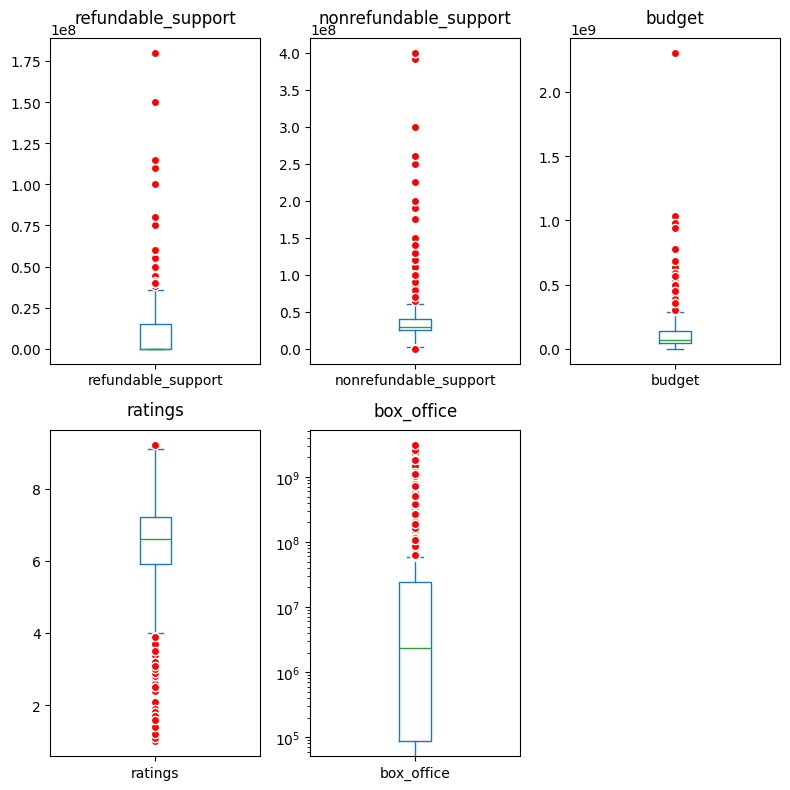

In [50]:
columns = ['refundable_support', 'nonrefundable_support',
           'budget', 'ratings', 'box_office']

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(2, 3, figsize=(8, 8), sharey=False)
fig.delaxes(axs[1][2])
for column, ax in zip(columns, axs.flat):
    df[column].plot.box(x=column, ax=ax,
                        flierprops=red_circle)
    ax.set_title(column, y=1.02)
    ax.tick_params(axis='y', labelsize=10)
    if column == 'box_office':
        ax.semilogy()

plt.tight_layout()
plt.show()

In [51]:
zero_budget_ids = df.query('budget < (nonrefundable_support + refundable_support)').index
df.loc[zero_budget_ids, ['title', 'nonrefundable_support', 'refundable_support', 'budget']]

,title,nonrefundable_support,refundable_support,budget
2053,14+,23 000 000.00,0.00,0.00
2058,Дуxless 2,75 000 000.00,0.00,0.00
2472,Воин (2015),70 000 000.00,10 000 000.00,0.00
2532,Бармен.,0.00,20 000 000.00,0.00
2615,Савва. Сердце воина,100 000 000.00,60 000 000.00,0.00
2684,Тряпичный союз,59 000 000.00,0.00,0.00
2788,Срочно выйду замуж,35 000 000.00,0.00,0.00
2874,Помню - не помню!,6 000 000.00,0.00,0.00
3047,Любовь с ограничениями,51 000 000.00,19 000 000.00,0.00
3565,Притяжение (2016),250 000 000.00,0.00,0.00


In [52]:
df.loc[zero_budget_ids, 'budget'] = float('nan')

**Вывод.**  
Рейтинг, указанный в процентах, не соответствовал пользовательскому рейтингу на Кинопоиске, поэтому был заменен значением `NaN`.  
Нулевые значения в колонке с бюджетом фильма появились по причине не предоставления правообладателем необходимой информации.  
Бюджеты равные нулю были заменены значением `NaN`.

In [53]:
a, b = len(temp), len(df)
print(len(temp), len(df), round((a-b)/a*100, 2))

7486 7486 0.0


### Новые столбцы

Выделим год из даты премьеры фильма.

In [54]:
df['show_start_year'] = df['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [55]:
df['main_director'] = df['director'].str.strip()

df['main_director'] = \
df['main_director'].str.replace(r'\s{2,}', ' ', regex=True)
df['main_director'] = \
df['main_director'].str.replace(r'[\,\.](?=[А-Я])', ' ', regex=True)

In [56]:
df['main_director'] = \
df['main_director'].str.split(r'[;,]\s*').str[0]

df['main_director'] = \
df['main_director'].str.replace(r'^(.*\().*\s(\S*\))', r'\1\2', regex=True)

df['main_director'] = \
df['main_director'].str.replace(r'\s+(?:при|по|в|и) .*$', '', regex=True)


df['main_director'] = \
df['main_director'].str.replace(r'(?<=[а-яё]{3})\. .*$', '', regex=True)

temp_dict = {'я': 'й', 'а':'', 'ы': 'а'}
mask = df['main_director'].str.contains('хореография')

df.loc[mask, 'main_director'] = (
    df.loc[mask, 'main_director'].str.replace(
        r'([аяы])(?=\s|$)', lambda x: temp_dict[x.group()], regex=True
    )
)

df['main_director'] = \
df['main_director'].str.replace(r'^[^А-ЯЁ]*', '', regex=True)

df['main_director'] = \
df['main_director'].str.replace('.', '', regex=False)

In [57]:
df.loc[(df['director'].str.len() > 25) & (~df['director'].str.contains(',|;')),
       ['director', 'main_director']].drop_duplicates(subset=['director'])

,director,main_director
389,Николас Виндинг Рефн,Николас Виндинг Рефн
390,Маттис ван Хейникен младший,Маттис ван Хейникен младший
724,хореография Фредерика Эштона,Фредерик Эштон
766,хореография Василия Вайнонена. Андреас Морелл,Василий Вайнонен
869,В.Волгин при участии А.Ягубец,В Волгин
...,...,...
7171,А.Михалков (псевдоним А.Кончаловский),А Михалков (Кончаловский)
7189,Д.Штурманова (псевдоним: Дуня Лисова),Д Штурманова (Лисова)
7257,Т.Андрианова (псевд.Т.Вигель),Т Андрианова (Вигель)
7424,О.Арлаускайте (псевд.О.Арлаускас),О Арлаускайте (Арлаускас)


In [58]:
df.loc[df['director'] == 'unknown', 'main_director'] = 'unknown'
df.loc[[335, 2958, 4404], 'main_director'] = \
'Ричард Эйр', 'София Родкевич', 'Майкл Спайриг'

In [59]:
df['main_genre'] = df['genres'].str.split(',').str[0]
df['main_genre']

0           боевик
1            драма
2       фантастика
3       фантастика
4       фантастика
           ...    
7481           NaN
7482        боевик
7483           NaN
7484           NaN
7485       комедия
Name: main_genre, Length: 7486, dtype: object

Доля государственной поддержки от общего бюджета фильма.

In [60]:
df['support_total'] = df['refundable_support'] + df['nonrefundable_support']
df['support_to_budget_ratio'] = df['support_total'] / df['budget']

**Вывод по разделу 2:**  
1. В столбцах `show_start_date`, `ratings`, `type` и `age_restriction` преобразованы типы данных.
2. Почти во всех колонках с категориальными переменными обнаружена общая проблема – неявные дубликаты. Появились они в результате отсутствия единого формата для ввода имён и названий, а также опечаток и лишних пробелов. Наряду с этим, основной причиной неявных дубликатов можно считать отсутствие правил для перевода иностранных имён собственных на русский язык.
3. Обработаны неявные дубликаты в столбцах `type` и `production_country`.
4. Обработаны аномальные значения в количественных переменных.
5. Добавлены новые столбцы:  
    - `show_start_year` - года проката;
    - `main_genre` - главный жанр; 
    - `main_director` - имя и фамилия главного режиссёра;
    - `support_to_budget_ratio` - доля государственной поддержки от общего бюджета картины.

## Исследовательский анализ данных


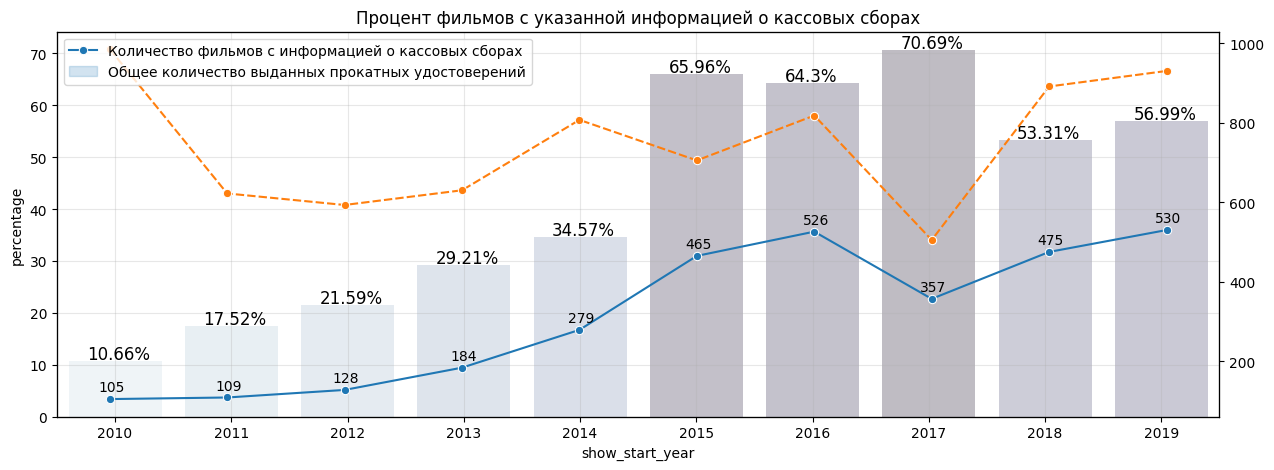

In [61]:
movies_per_year = df.pivot_table(index='show_start_year',
                           values=['puNumber', 'box_office'],
                           aggfunc=['count'])
movies_per_year.columns = ['box_office_count', 'puNumber_count']
movies_per_year['percentage'] = \
(movies_per_year['box_office_count'] / movies_per_year['puNumber_count'])
movies_per_year['percentage'] = (movies_per_year['percentage'] * 100).round(2)

fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(data=movies_per_year, x=movies_per_year.index, y='percentage',
            palette="ch:s=.25,rot=-.25", hue='percentage', dodge=False, alpha=0.3, ax=ax)

for item in ax.patches:
    if item.get_height():
        plt.annotate(f'{item.get_height()}%',
                     (item.get_x() + item.get_width() / 5, item.get_height()+0.4),
                     fontsize=12)

ax2 = ax.twinx().twiny()
sns.lineplot(data=movies_per_year[['box_office_count', 'puNumber_count']], marker='o', ax=ax2)
ax2.set_xticks([])
ax2.set_xlabel('')

row = 0
for year, count in movies_per_year['box_office_count'].items():
    plt.text(year-.1, movies_per_year['box_office_count'].iloc[row]+20,
             count)
    row += 1

plt.legend(loc='upper left',
           labels=['Количество фильмов с информацией о кассовых сборах',
                  'Общее количество выданных прокатных удостоверений'])

plt.title('Процент фильмов с указанной информацией о кассовых сборах')
ax.legend_.remove()
ax.grid(alpha=0.3)

plt.show()

Начиная с 2015-го года гораздо больше фильмов с информацией о кассовых сборах.   
Вероятно, в большей степени это связано с тем, что с 2015-го года чаще собирали информацию о прокате,  
так как тенденции к росту общего количества выданных прокатных удостоверений не просматривается.

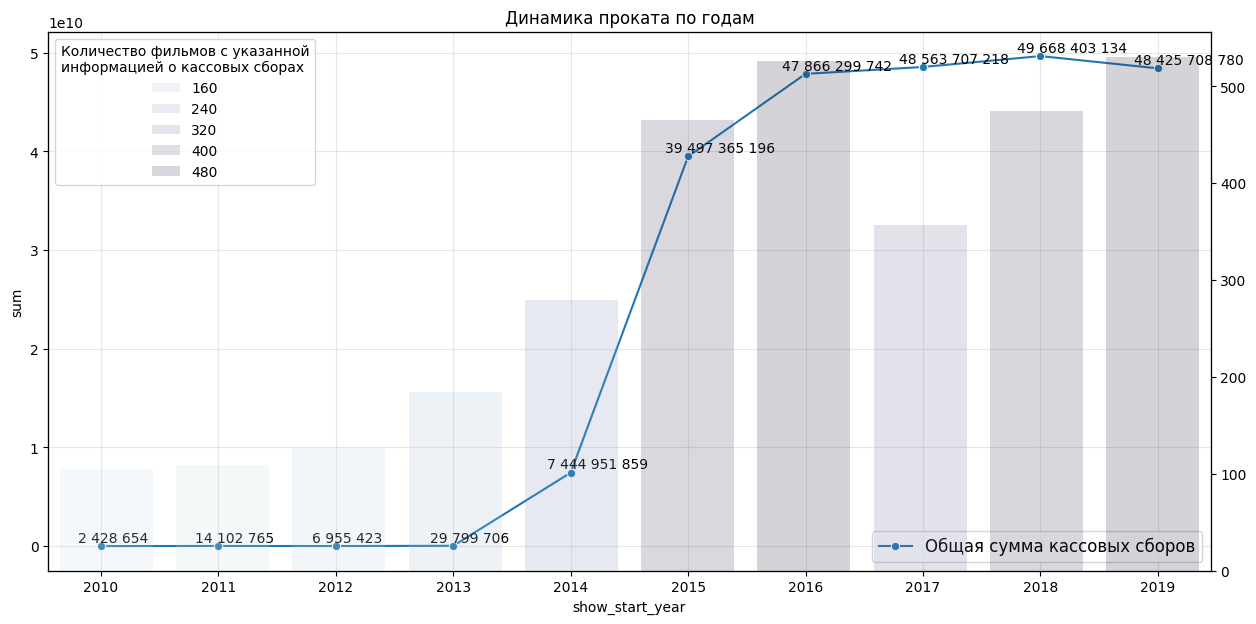

In [62]:
box_office_total_per_year = \
df.pivot_table(index='show_start_year', values='box_office', aggfunc=['sum', 'count'])
box_office_total_per_year.columns = ['sum', 'count']

fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=box_office_total_per_year['sum'], marker='o', ax=ax)

for year, total_sum in box_office_total_per_year['sum'].items():
    plt.text(year-0.2, total_sum+4e8, f'{total_sum:,.0f}'.replace(',', ' '))

ax2 = ax.twinx().twiny()
sns.barplot(data=box_office_total_per_year, x=box_office_total_per_year.index, 
            y='count', palette="ch:s=.25,rot=-.25",
            hue='count', dodge=False, alpha=0.2, ax=ax2);

ax2.set_xticks([])
ax2.set_xlabel('')
ax2.legend(
    title='Количество фильмов с указанной\nинформацией о кассовых сборах')

plt.title('Динамика проката по годам')
ax.legend(loc='lower right', fontsize=12,
          labels=['Общая сумма кассовых сборов'])
ax.set_xticks(box_office_total_per_year.index)
ax.grid(True, alpha=0.3)
plt.show()

Резкий рост суммы сборов в 2015-м году, говорит в пользу гипотезы, что данные о прокате в период с 2010-го по 2014 год включительно   
собирались редко. Поэтому игнорируем информацию за этот период.  
Минимальной сумма сборов была в 2015-м году, максимальной – в 2018-м.  
Наименьшее количество фильмов вышло в прокат в 2017-м году, тем не менее по сумме кассовых сборов этот год уступает только 2018-му.  
В целом, сумма кассовых сборов за период с 2016-го по 2019-й год включительно менялась незначительно.

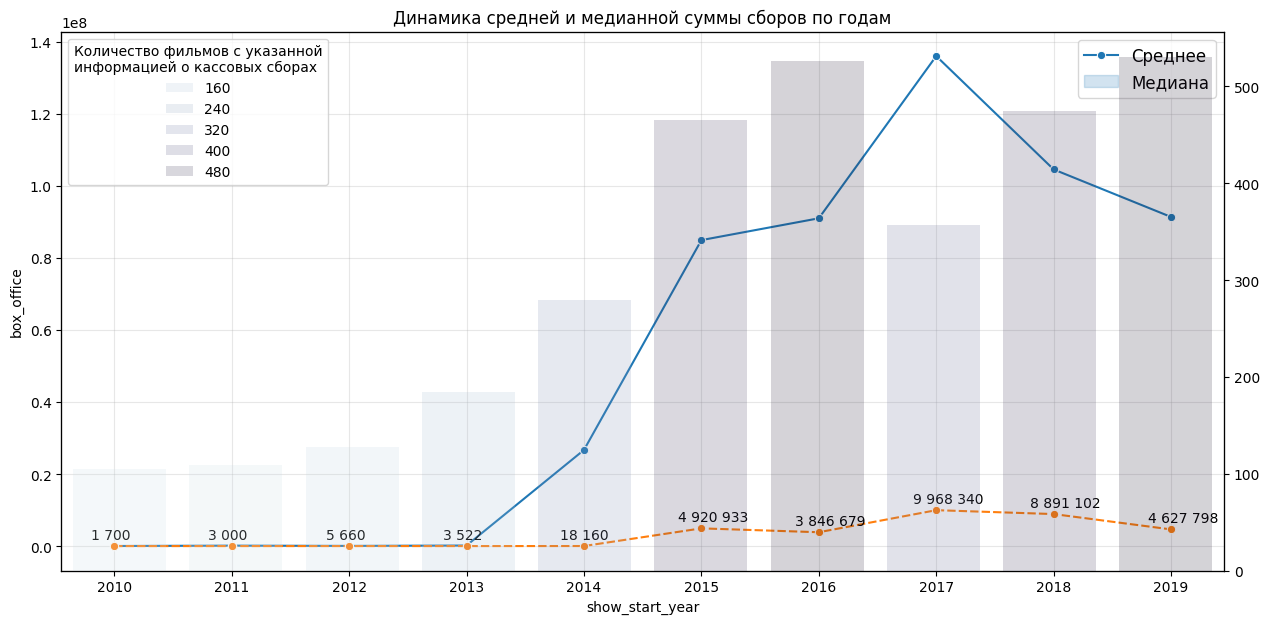

In [63]:
box_office = df.pivot_table(index='show_start_year', values='box_office',
                                        aggfunc=['mean', 'median', 'count'])


box_office.columns = ['mean', 'median', 'count']

fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data=box_office[['mean', 'median']], marker='o', ax=ax)

for year, median in box_office['median'].items():
    plt.text(year-0.2, median+2e6, f'{median:,.0f}'.replace(',', ' '))
    row += 1

ax2 = ax.twinx().twiny()
sns.barplot(data=box_office, x=box_office.index, 
            y='count', palette="ch:s=.25,rot=-.25",
            hue='count', dodge=False, alpha=0.2, ax=ax2);

ax2.set_xticks([])
ax2.set_xlabel('')
ax2.legend(
    title='Количество фильмов с указанной\nинформацией о кассовых сборах')

plt.title('Динамика средней и медианной суммы сборов по годам')
ax.set_ylabel('box_office')
ax.legend(bbox_to_anchor=(1,1), fontsize=12,
          labels=['Среднее', 'Медиана'])
ax.set_xticks(box_office_total_per_year.index)
ax.grid(True, alpha=0.3)
plt.show()

Средняя сумма кассовых сборов сильно отличается от медианной: относительно небольшое количество фильмов приносит основную часть прибыли.  
Самым успешным как по среднему, так и медианному доходу был 2017-й год.  
Самым неудачным по среднему доходу был 2015-й.  
Наименьшие медианные суммы собирали в 2016-м и 2019-м – годы с наибольшем количеством выпущенных в прокат картин.

In [64]:
df['age_restriction'] = \
df['age_restriction'].str.extract(r'(«.*?»)', expand=False)

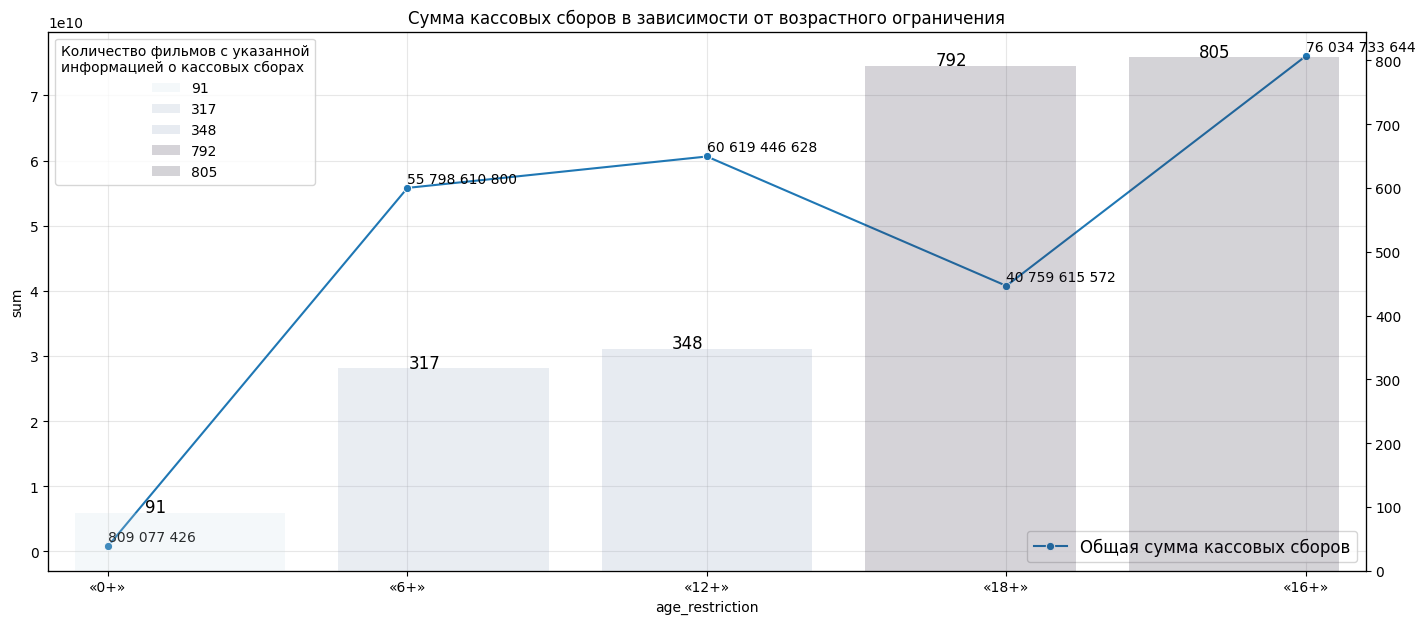

In [65]:
age_restriction = (
    df.query('show_start_year > 2014')
    .pivot_table(index='age_restriction', values='box_office',
                 aggfunc=['sum', 'count'])
)
age_restriction.columns = ['sum', 'count']
age_restriction = age_restriction.sort_values(by='count')

fig, ax = plt.subplots(figsize=(17, 7))
sns.lineplot(data=age_restriction['sum'], marker='o', ax=ax)


for restriction, total_sum in age_restriction['sum'].items():
    plt.text(restriction, total_sum+8e8, f'{total_sum:,.0f}'.replace(',', ' '))

ax2 = ax.twinx().twiny()
sns.barplot(data=age_restriction, x=age_restriction['sum'].index, 
            y='count', palette="ch:s=.25,rot=-.25",
            hue='count', dodge=False, alpha=0.2, ax=ax2)

for item in ax2.patches:
    if item.get_height():
        plt.annotate(f'{item.get_height():.0f}',
                     (item.get_x() + item.get_width() / 3, item.get_height()+0.4),
                     fontsize=12)

ax2.set_xticks([])
ax2.set_xlabel('')
ax2.legend(
    title='Количество фильмов с указанной\nинформацией о кассовых сборах')

ax.legend(loc='lower right', fontsize=12,
          labels=['Общая сумма кассовых сборов'])
ax.set_xticks(age_restriction['sum'].index)
ax.grid(True, alpha=0.3)
plt.title('Сумма кассовых сборов в зависимости от возрастного ограничения')
plt.show()

Наименее прибыльными оказались картины без возрастных ограничений.  
Группа ‘’18+’’, несмотря на свою многочисленность, собрала в прокате меньше, чем фильмы с менее жёсткими возрастными  ограничениями.  
Высокий возрастной рейтинг сокращает потенциальную аудиторию ленты.  
У картин с возрастным рейтингом “6+” и “12+” в среднем были более высокие кассовые сборы в сравнении с остальными группами.  
Лидером по общим кассовым сборам оказалась самая многочисленная группа - “16+”.

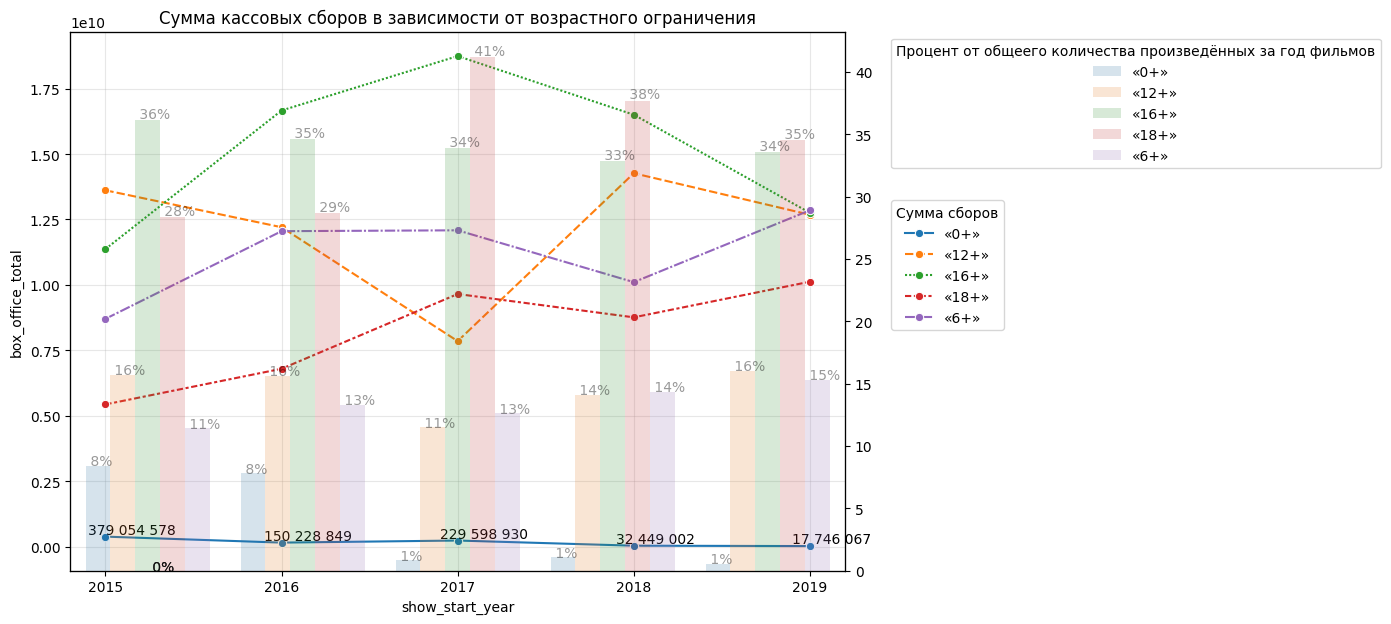

In [66]:
age_restriction = (
    df.query('show_start_year > 2014')
    .pivot_table(index='show_start_year', columns='age_restriction',
                 values='box_office', aggfunc=['sum', 'count'])
)


fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=age_restriction['sum'], marker='o', ax=ax)


for year, value in age_restriction['sum']['«0+»'].items():
    plt.text(year-.1, value+1e8, f'{value:,.0f}'.replace(',', ' '))

ax2 = ax.twinx().twiny()
temp = age_restriction['count'].div(age_restriction['count'].sum(axis=1), axis=0)
temp *= 100
temp = temp.melt(ignore_index=False)
sns.barplot(data=temp, x=temp.index, 
            y='value', hue='age_restriction', alpha=0.2, ax=ax2)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height(): .0f}%',
                 (p.get_x(), p.get_height() * 1.005), alpha=.4)

ax2.set_xticks([])
ax2.set_xlabel('')
ax.set_ylabel('box_office_total')
ax.legend(title='Сумма сборов', bbox_to_anchor=(1.05,.7))
ax2.legend(title='Процент от общеего количества произведённых за год фильмов',
           bbox_to_anchor=(1.05,1))

ax.set_xticks(age_restriction['sum'].index)
ax.grid(True, alpha=0.3)
plt.title('Сумма кассовых сборов в зависимости от возрастного ограничения')
plt.show()

Ситуация с самым прибыльным возрастным рейтнигом в зависимости от года менялась незначительно,   
с учётом того, что его определяет относительно небольшое число самых кассовых фильмов.  
Просматривается тенденция к росту кассовых сборов для картин с возрастным ограничением "18+".

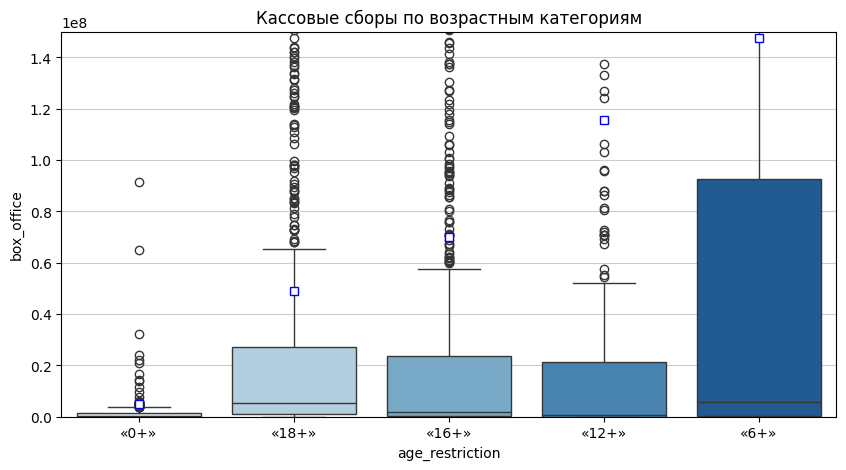

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x=df['age_restriction'], y=df['box_office'], palette='Blues',
    showmeans=True, order=['«0+»', '«18+»', '«16+»', '«12+»', '«6+»'],
    meanprops={'marker': 's','markerfacecolor': 'white',
               'markeredgecolor': 'blue'}
)
plt.grid(axis='y', color='black', alpha=0.2)
plt.title('Кассовые сборы по возрастным категориям')
plt.ylim(0, 1.5e8);

Категории "12+" и "6+" в среднем собирали больше остальных.  
По медианным сборам лидируют фильмы с возрастными ограничениями "18+" и "6+"

## Исследование фильмов, которые получили государственную поддержку

In [68]:
supported_df = df.query('financing_source.notna()').copy()

Добавим новые колонки:
- `roi` - информация об окупаемости фильма (в процентах);
- `show_start_month` - месяц проката фильма.

In [69]:
supported_df['roi'] = (supported_df['box_office'] / supported_df['budget'] - 1) * 100
supported_df['show_start_month'] = supported_df['show_start_date'].dt.month

In [70]:
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
months = dict(enumerate(months, start=1))
supported_df['show_start_month'] = supported_df['show_start_month'].map(months)

In [71]:
def get_histogram(data, col, title, f_size=(15, 3), bins_num=20):
    col_format = {'ratings': 2, 'box_office': 0}
    frmt = col_format[col]
    median = data[col].median()
    mean = data[col].mean()
    plt.figure(figsize=f_size)
    histogram = sns.histplot(data[col], bins=bins_num,
                             edgecolor='white', kde=True)
    plt.axvline(x=median, c='r',
                label=f'Медиана: {median:,.{frmt}f}'.replace(',', ' '))
    plt.axvline(x=mean, c='r', ls='--',
                label=f'Среднее: {mean:,.{frmt}f}'.replace(',', ' '))
    plt.title(title)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=.3)
    return histogram

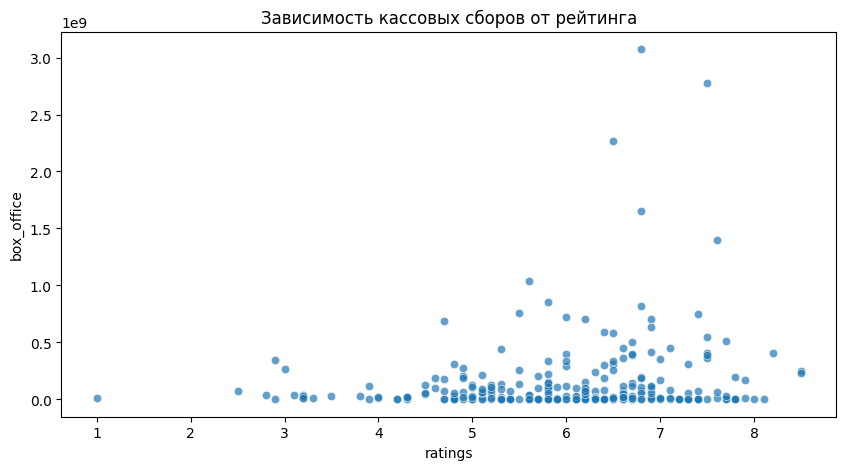

,ratings,box_office
ratings,1.00,0.05
box_office,0.05,1.00


In [72]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=supported_df, x='ratings', y='box_office', alpha=0.7)
plt.title('Зависимость кассовых сборов от рейтинга')
plt.show()
supported_df[['ratings', 'box_office']].corr('spearman')

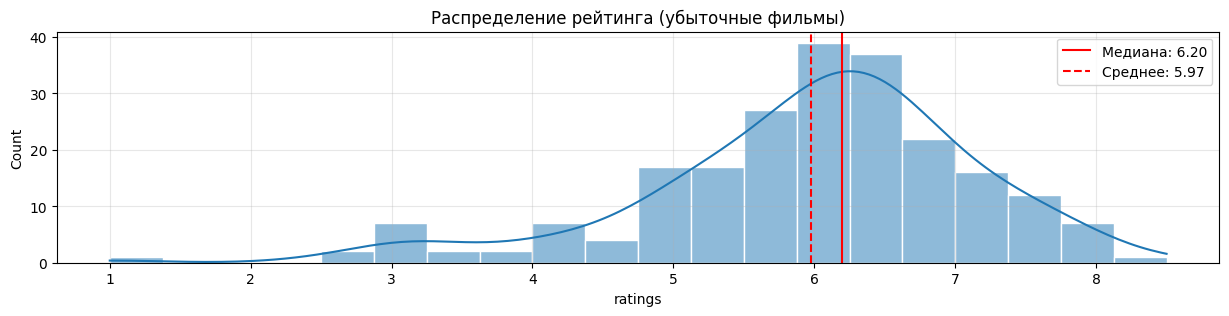

,count,mean,std,min,25%,50%,75%,max
ratings,220.00,5.97,1.16,1.00,5.40,6.20,6.70,8.50


,count,mean,std,min,25%,50%,75%,max
ratings,65.00,6.15,1.08,2.90,5.30,6.40,6.90,8.50


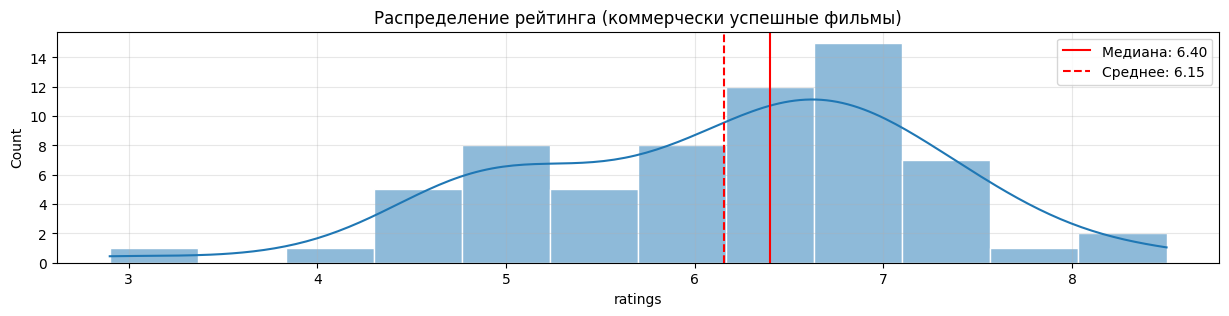

In [73]:
title = 'Распределение рейтинга (убыточные фильмы)'
get_histogram(supported_df.query('roi <= 0'), 'ratings', title)
plt.show()
display(supported_df.query('roi <= 0')[['ratings']].describe().T)
title = 'Распределение рейтинга (коммерчески успешные фильмы)'
get_histogram(supported_df.query('roi > 0'), 'ratings', title, bins_num=12)
supported_df.query('roi > 0')[['ratings']].describe().T

Рейтинг не оказывает значительного влияния на кассовые сборы и окупаемость картины.

,count,mean,std,min,25%,50%,75%,max
box_office,318.00,132 432 420.05,334 837 856.99,1 550.00,1 236 675.50,15 720 067.71,106 373 008.27,3 073 568 690.79


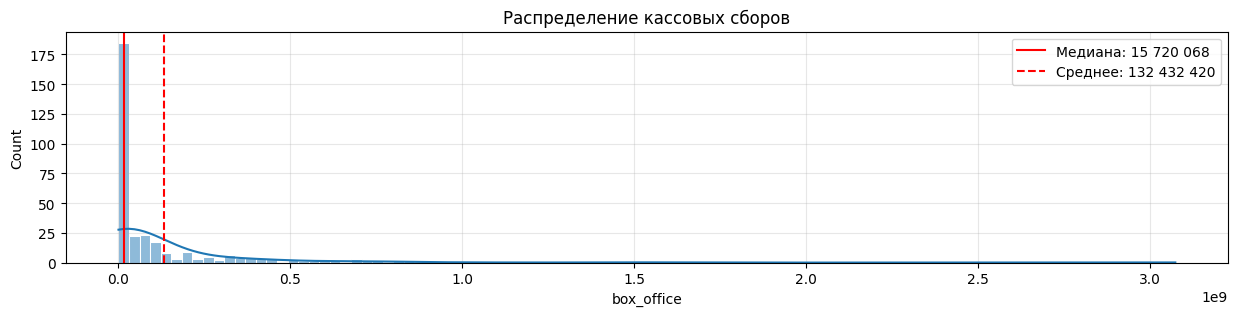

In [74]:
title = 'Распределение кассовых сборов'
get_histogram(supported_df, 'box_office', title, bins_num=100)
supported_df[['box_office']].describe().T

Основная часть кассовых сборов лежит в диапазоне до 110 млн рублей.  
Половина фильмов, получивших государственную поддержку, собирали в прокате менее 20 млн рублей.

In [75]:
min_budget = f'{supported_df.query("roi > 0")["budget"].min():,.0f}'.replace(',', ' ')
print(f'Минимальный бюджет коммерчески успешного фильма равен {min_budget} рублей')
max_budget = f'{supported_df.query("roi > 0")["budget"].max():,.0f}'.replace(',', ' ')
print(f'Максимальный бюджет коммерчески успешного фильма равен {max_budget} рублей')
max_idx = supported_df.query("roi > 0")["box_office"].idxmax()
title, box_office = supported_df.loc[max_idx, ['title', 'box_office']].values
print(f'Самый кассовый фильм: "{title}" - {box_office:,.0f} рубль'.replace(',', ' '))

Минимальный бюджет коммерчески успешного фильма равен 31 305 313 рублей
Максимальный бюджет коммерчески успешного фильма равен 635 283 867 рублей
Самый кассовый фильм: "Холоп" - 3 073 568 691 рубль


In [76]:
movies_supported = (
    supported_df.query('show_start_year > 2014')
    .pivot_table(index='show_start_year',
                 values=['budget', 'support_total', 'refundable_support',
                         'nonrefundable_support', 'box_office'],
                 aggfunc=['sum', 'size'])
)
movies_supported.columns = ['box_office', 'budget', 'nonrefundable_support',
                            'refundable_support', 'support_total', 'count']

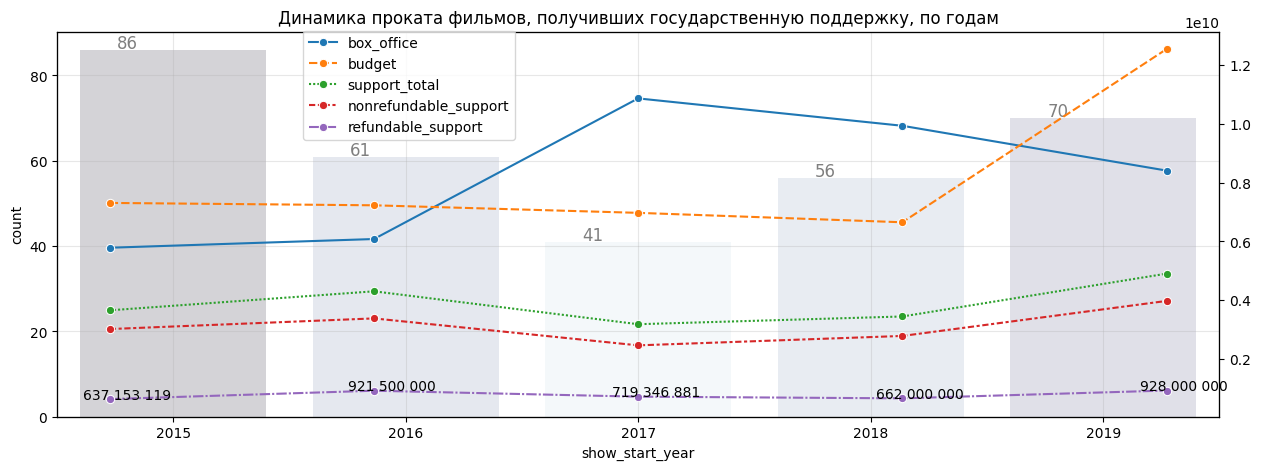

In [77]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(data=movies_supported, x=movies_supported.index, y='count',
            palette='ch:s=.25,rot=-.25', hue='count',
            dodge=False, alpha=0.2, ax=ax)

for item in ax.patches:
    if item.get_height():
        plt.annotate(f'{item.get_height():.0f}',
                     (item.get_x() + item.get_width() / 5, item.get_height()+0.4),
                     fontsize=12, alpha=.5)

ax2 = ax.twinx().twiny()
sns.lineplot(data=movies_supported[['box_office', 'budget', 'support_total',
                                  'nonrefundable_support', 'refundable_support']],
             marker='o', ax=ax2)
ax2.set_xticks([])
ax2.set_xlabel('')

row = 0
for year, r_support in movies_supported['refundable_support'].items():
    plt.text(year-.1, movies_supported['refundable_support'].iloc[row]+20,
             f'{int(r_support):,}'.replace(',', ' '))
    row += 1

ax.legend_.remove()
ax.grid(alpha=0.3)
plt.title('Динамика проката фильмов, получивших государственную поддержку, по годам')
ax2.legend(bbox_to_anchor=(.4,.7))
plt.show()

In [78]:
movies_supported[['box_office', 'count']].corr()

,box_office,count
box_office,1.00,-0.80
count,-0.80,1.00


Самым успешным по кассовым сборам был 2017-й год, самым неудачным – 2015-й.  
В 2017-м и 2018-м поддержку получило наименьшее количество лент, при этом их общий бюджет сопоставим с бюджетом фильмов, снятых в предыдущие годы.  
2016-й и 2019-й год лидирует по общему количеству вышедших в прокат лент, что могло негативно отразиться на кассовых сборах картин, получивших государственную поддержку. 


**Средняя окупаемость фильмов в зависимости от месяца релиза.**

In [79]:
roi_per_month = \
supported_df.pivot_table(index='show_start_month', values='roi',
                         aggfunc=['mean', 'count'])
roi_per_month.columns = ['mean', 'count']
roi_per_month.sort_values(by='mean', ascending=False)

,mean,count
show_start_month,,
Декабрь,118.92,32
Февраль,32.07,17
Октябрь,14.71,32
Март,9.87,23
Январь,-25.40,23
Сентябрь,-39.96,22
Апрель,-60.68,28
Июнь,-61.48,39
Ноябрь,-66.63,23


Наиболее удачный для релиза месяц – декабрь.  
Хуже всего окупались картины, выпущенные в июле.

**Рейтинг киностудий по количеству и медианной окупаемости фильмов.**

In [80]:
supported_df['filtered_studio'] = \
supported_df['filtered_studio'].fillna(df['film_studio'])

In [81]:
top_ten_studios = (
    supported_df
    .pivot_table(index='filtered_studio', values='roi',
                 aggfunc=['median', 'count'])
)
top_ten_studios.columns = ['roi_median', 'count']
top_ten_studios.sort_values(by='count', ascending=False).head(10)

,roi_median,count
filtered_studio,,
мельница,163.72,7
таббак,51.53,7
ств,-91.27,6
визарт фильм,-48.02,5
каро продакшн,-92.35,4
магнум-фильм,-50.61,4
ленфильм,-95.84,4
небо,67.28,4
вертикаль,-97.12,3


Студии “Мельница”, “Таббак” и “Небо” – лидеры по медианной окупаемости фильмов.  
“СТВ”, “Ленфильм” и “Каро продакшн” показали худшие результаты.

**Рейтинг режиссёров по количеству и медианной окупаемости фильмов.**

Найдём неявные дубликаты в столбце с именем главного режиссёра.

In [82]:
similar_directors = get_similar_values(
    supported_df, 'main_director', first_lim=78, attr1='partial_ratio'
)
similar_directors

{'К Оганисян': ['К Оганесян'],
 'А Михалков (Кончаловский)': ['А Михалков', 'А Кончаловский'],
 'Р Артемьев (Васильев)': ['Р Артемьев'],
 'М Бальчюнас (Вайсберг)': ['М Бальчюнас'],
 'К Белевич (Астахов)': ['К Белевич'],
 'А Черномазов (Нужный)': ['А Нужный'],
 'Т Игуменцева (Капитан)': ['Т Игуменцева'],
 'М Свешников': ['Максим Свешников']}

In [83]:
similar_directors['А Михалков (Кончаловский)'][0] = 'А Кончаловский'

Устраним дубликаты.

In [84]:
directors_before = supported_df['main_director'].unique()

In [85]:
supported_df['main_director'] = (
    supported_df['main_director'].map(similar_directors).str[0]
    .fillna(supported_df['main_director'])
)
directors_after = supported_df['main_director'].unique()
set(directors_before).difference(directors_after)

{'А Михалков (Кончаловский)',
 'А Черномазов (Нужный)',
 'К Белевич (Астахов)',
 'К Оганисян',
 'М Бальчюнас (Вайсберг)',
 'М Свешников',
 'Р Артемьев (Васильев)',
 'Т Игуменцева (Капитан)'}

In [86]:
top_ten_directors = (
    supported_df
    .pivot_table(index='main_director', values='roi', aggfunc=['median', 'count'])
)
top_ten_directors.columns = ['roi_median', 'count']
top_ten_directors.sort_values(by='count', ascending=False).head(10)

,roi_median,count
main_director,,
Р Давлетьяров,-89.66,5
Д Дьяченко,129.86,4
С Андреасян,-13.90,4
К Шипенко,52.45,3
А Цицилин,-48.02,3
Д Шмидт,163.72,3
А Котт,-99.76,3
С Мокрицкий,2.04,3
А Аксененко,-45.90,3


В лидерах по медианной окупаемости фильма Д. Дьяченко, Д. Шмидт, К. Шипенко.    
Худшие результаты показали Р. Давлетьяров, А. Котт и А. Цицилин.

**Общие кассовые сборы фильмов в зависимости от жанра.**

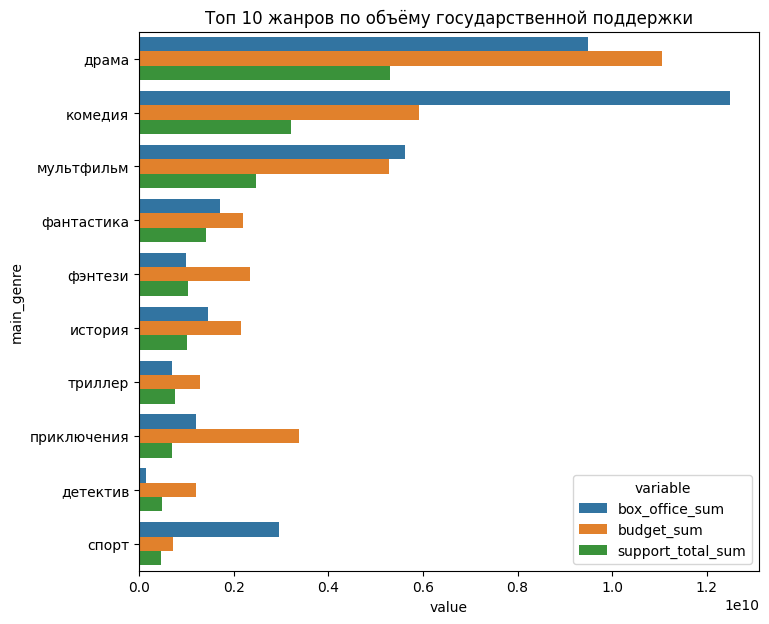

In [87]:
top_ten_genres = \
supported_df.pivot_table(index='main_genre',
                         values=['support_total', 'budget', 'box_office'],
                         aggfunc=['sum'])
top_ten_genres.columns = ['box_office_sum', 'budget_sum',
                          'support_total_sum']
top_ten_genres = top_ten_genres.sort_values(by=['support_total_sum'],
                                            ascending=False).head(10)
melted = top_ten_genres.melt(ignore_index=False)

plt.figure(figsize=(8, 7))
ax = sns.barplot(data=melted, x='value', y=melted.index, hue='variable')

plt.title('Топ 10 жанров по объёму государственной поддержки')
plt.show()

В наибольших объёмах государственную поддержку получали драмы, комедии и мультфильмы.  
Комедии, мультфильмы и спорт – единственные жанры в рейтинге, которые окупили вложенные средства.  

## Общий вывод

**Описание данных.**  
`title` — название фильма;  
`puNumber` — номер прокатного удостоверения;  
`show_start_date` — дата премьеры фильма;  
`type` — тип фильма;  
`film_studio` — студия-производитель;  
`production_country` — страна-производитель;  
`director` — режиссёр;  
`producer` — продюсер;  
`age_restriction` — возрастная категория;  
`refundable_support` — объём возвратных средств государственной поддержки;  
`nonrefundable_support` — объём невозвратных средств государственной поддержки;  
`financing_source` — источник государственного финансирования;  
`budget` — общий бюджет фильма;  
`ratings` — рейтинг фильма на КиноПоиске;  
`genres` — жанр фильма;  
`puNumber` — номер прокатного удостоверения;  
`box_office` — сборы в рублях.

**Предобработка данных:**  
1. Значения в колонке `puNumber` приведены к целочисленному типу данных, `age_restriction` и `type` преобразованы в категории,  
`show_start_date` - в даты.  
2. В колонках с категориальными данными были обнаружены неявные дубликаты. Основной причиной их появления послужило то,  
что не был стандартизирован ввод данных, в том числе при передаче иностранных имён собственных на русский язык.  
Также многие неявные дубликаты появились в результате опечаток.  
3. С количественными переменными проблемы обнаружились в колонках `ratings`, `budget` и `puNumber`.
В `puNumber` присутствуют два дубликата. Значения рейтинга, указанные в процентах, не соответствовали пользовательскому рейтингу на Кинопоиске.  
В столбце `budget` содержались нулевые значения, которые появились в результате того, что правообладатель  
не предоставил информацию о бюджете картины.

**Исследовательский анализ данных:**  
1. Самым успешным как по среднему, так и медианному доходу был 2017-й год. Возможно, повлияло малое количество фильмов, вышедших в прокат.
2. В 2018-м году были самые большие общие кассовые сборы.  
3. C 2016-го по 2019-й год включительно, не смотря на различное количество вышедших в прокат лент, общие кассовые сборы оставались примерно на одном уровне.  
4. Возрастной рейтинг “18+” значительно сокращает потенциальную аудиторию кинокартины.  
5. Фильмы с возрастными ограничениями “6+” и “12+” в среднем собирают больше остальных.  
6. Наибольшие общие кассовые сборы были у самой многочисленной категории - “16+”.

**Фильмы, которые получили государственную поддержку:**  
1. В 2017-м и 2018-м годах общие кассовые сборы окупали средства, вложенные в производство кинокартин.
2. Основная часть фильмов собирает в прокате менее 110 млн рублей.  
3. Рейтинг не оказывает значительного влияния на кассовые сборы картины.  
4. Существует отрицательная корреляция между количеством лент, получивших господдержку, и их окупаемостью.  
5. Декабрь – самый удачный для релиза месяц.  
6. Лидерами по медианной окупаемости картин являются студии “Мельница”, “Таббак” и “Небо, а также  
режиссёры Д. Дьяченко, К. Шипенко и Д. Шмидт.  
7. Комедия и мультфильм - наиболее окупаемые жанры.  
8. Самый кассовый фильм собрал в прокате 3,074 млрд рублей  